In [18]:
import matplotlib.pyplot as plt
import math as m
import random as ra
import gc

In [19]:
def axes3d(num):
    num = m.floor(num)
    xorig = []
    yorig = []
    zorig = []
    null_list_1 = []
    null_list_2 = []


    for j in range((0 - num), (0 + num + 1), 1):
        xorig.append(j)
        yorig.append(j)
        zorig.append(j)
        null_list_1.append(0)
        null_list_2.append(0)

    ##Drawing X-Axis:
    plt.plot(xorig, null_list_1, null_list_2, color='#c41818', linewidth=1, marker=',', markerfacecolor='#c41818',markersize=0, label='X-Axis')
    ##Drawing Y-Axis:
    plt.plot(null_list_1, yorig, null_list_2, color='#18c431', linewidth=1, marker=',', markerfacecolor='#18c431',markersize=0, label='Y-Axis')
    ##Drawing Z-Axis:
    plt.plot(null_list_1, null_list_2, zorig, color ='#185ac4', linewidth=1, marker =',', markerfacecolor = '#1350ba',markersize=0, label='Z-Axis')

In [20]:
##Method to simultaneously determine both the largest and smallest value in a list of numbers (int or float):
def maxmin(ls):
    high = 1.2E-38
    low = 3.4E+38
    for i in range(len(ls)-1):
        if ls[i] > high:
            high = ls[i]
        if ls[i] < low:
            low = ls[i]
    res = [high, low]
    return res

In [21]:
##Method to draw the Reference XY-Plane, denoting the ground-level:
def xy_plane(num):
    x = []
    y = []
    null_list_1 = []
    num_minus = 0 - m.floor(num)
    num_plus = 0 + m.floor(num) + 1

    for i in range(num_minus,num_plus):
        for j in range(num_minus,num_plus):
            x.append(i)
            y.append(j)
            null_list_1.append(0)

    plt.plot(x, y, color = '#bababa', marker = ',', linewidth = 0, markersize = 1, alpha=0.2)

In [22]:
##Method to draw the trajectory of a single, random Projectile, given the height from which it was launched with reference to the ground-level:
def projectile3D(height):
    x_cor = []
    y_cor = []
    z_cor = []

    ra.seed()
    g = 9.81
    phi = m.radians(ra.randrange(0,361,1)) #PHI is the angle the path makes on the XY-plane with the x-axis.
    theta = m.radians(ra.randrange(0,91,1)) #Theta is the initial angle of projection.
    int_v = ra.randrange(30,61)

    u_h = int_v*m.cos(theta)
    u_v = int_v*m.sin(theta)
    u_x = u_h*m.cos(phi)
    u_y = u_h*m.sin(phi)
    u_z = u_v

    time_of_flight = (2 * int_v * m.sin(theta)) / g
    ##Did not end up using it, but this can be used as a loop condition as well such as for any value of displacement along XY-Plane, 'd': "while d <= floor_range".
    #floor_range = ((int_v ** 2) * m.sin(2 * theta)) / g

    t = 0
    x = 0
    y = 0
    z = 0

    while z+height >= 0 or t <= time_of_flight:
        x = u_x * t
        y = u_y * t
        z = (u_z * t) - (g * (t ** 2)) * 0.5
        x_cor.append(x)
        y_cor.append(y)
        z_cor.append(height+z)
        t = t + 0.01

    max_x = maxmin(x_cor)
    max_y = maxmin(y_cor)
    max_z = maxmin(z_cor)
    max_of_all = maxmin([abs(max_x[0]), abs(max_x[1]), abs(max_y[0]), abs(max_y[1]), abs(max_z[0]), abs(max_z[1])])

    plt.plot(x_cor, y_cor, z_cor, linewidth=1, label=f'θ = {format(m.degrees(theta), "0.1f")}deg; U = {int_v}m/s; h = {height}m; Φ = {format(m.degrees(phi), "0.1f")}deg.')
    # plt.plot(x_cor, y_cor, z_cor, linewidth=1)

    plt.plot(x_cor[0],y_cor[0],z_cor[0], color = '#303030', marker='o',markerfacecolor='#69c400', markersize=5)
    plt.plot(x_cor[len(x_cor)-1], y_cor[len(y_cor)-1], z_cor[len(z_cor)-1], color='#303030', marker='o', markerfacecolor='#ffffff', markersize=5)


    return max_of_all[0]

In [27]:
##Packing main script statements in a method called 'main':
def main():
    ##For Debugging Purposes; Comment-out for deployment.
    #num_of_projections = 1
    #height = 0

    plt.axes(projection="3d")

    try:
        num_of_projections = int(input("Enter the number of projections you require: "))
        height = int(input("Enter the height (along vertical axis) of the projection(s): "))
    except Exception as e:
        print(e)
        exit()

    ##Reference Plane Construction:
    xy_plane(250)

    for i in range(num_of_projections):
        max_all = projectile3D(height)

    axes3d(max_all)

    ##Legend View; Comment-Out for deployment.
    plt.legend()
    plt.tight_layout()
    plt.show()
    gc.collect()

    return None

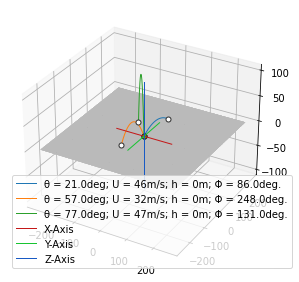

In [28]:
main()